In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['feature_names', 'DESCR', 'target_names', 'target', 'data'])

In [20]:
data = iris['data']

In [5]:
def rn(m1, s1, m2, s2, n):
    return np.vstack([np.random.normal(m1, s1, n), np.random.normal(m2, s2, n)]).T

In [7]:
import numpy as np

In [9]:
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [15]:
%matplotlib inline

In [16]:
import seaborn as sns

In [21]:
from matplotlib import pyplot as plt

In [22]:
import numpy as np

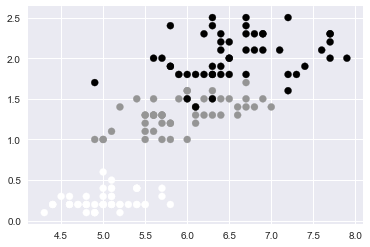

In [23]:
plt.scatter(data[:,0], data[:,3], c=iris['target'])

In [24]:
from sklearn.cluster import KMeans

In [25]:
k = 3

In [26]:
km = KMeans(n_clusters=k)

In [27]:
predicted = km.fit_predict(data)

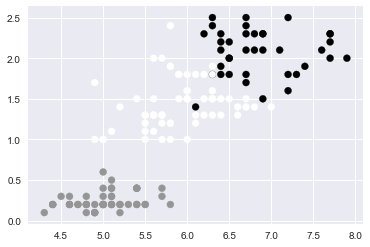

In [28]:
plt.scatter(data[:,0], data[:,3], c=predicted)

In [29]:
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [30]:
dist = km.transform(data)

In [31]:
dist

array([[ 3.41925061,  0.14694217,  5.0595416 ],
       [ 3.39857426,  0.43816892,  5.11494335],
       [ 3.56935666,  0.41230086,  5.27935534],
       [ 3.42240962,  0.51883716,  5.15358977],
       [ 3.46726403,  0.19796969,  5.10433388],
       [ 3.14673162,  0.68380699,  4.68148797],
       [ 3.51650264,  0.41520116,  5.21147652],
       [ 3.33654987,  0.0599333 ,  5.00252706],
       [ 3.57233779,  0.80099438,  5.32798107],
       [ 3.3583767 ,  0.36659514,  5.06790865],
       [ 3.32449131,  0.48784424,  4.89806763],
       [ 3.31126872,  0.25138019,  4.9966845 ],
       [ 3.46661272,  0.49192682,  5.19103612],
       [ 3.90578362,  0.90906105,  5.65173594],
       [ 3.646649  ,  1.02019214,  5.10804455],
       [ 3.49427881,  1.21309192,  4.88564095],
       [ 3.495248  ,  0.66241377,  5.03090587],
       [ 3.38444981,  0.1509702 ,  5.02342022],
       [ 3.11245944,  0.82848778,  4.61792995],
       [ 3.37738931,  0.39898872,  4.97213426],
       [ 3.07471224,  0.46172719,  4.695

In [32]:
sse = sum(dist[predicted==c][:, c].sum() for c in range(k))    

In [33]:
sse

97.32592423430016

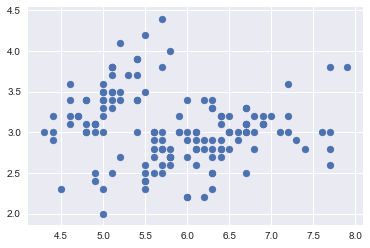

In [34]:
plt.scatter(data[:,0], data[:,1])

In [35]:
from scipy.spatial.distance import pdist

In [36]:
dist = pdist(data)
dist

array([ 0.53851648,  0.50990195,  0.64807407, ...,  0.6164414 ,
        0.64031242,  0.76811457])

In [37]:
dist.shape

(11175,)

In [38]:
tss = (pdist(data)**2).sum()/len(data)
tss

680.82439999999997

In [39]:
WCSSs = [] # within-cluster sum of squares for each k
VAR_explained = []
TSS = (pdist(data) ** 2).sum() / len(data)
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    predicted = km.fit_predict(data)
    dist = km.transform(data)
    squared_dist = dist.min(axis=1)**2
    WCSS = squared_dist.sum()
    BSS = TSS - WCSS
    
    WCSSs.append(WCSS)
    VAR_explained.append(BSS/TSS)

In [40]:
WCSSs

[680.82440000000042,
 152.36870647733861,
 78.940841426145937,
 57.344923809523884,
 46.535582051282844,
 38.957011157120306,
 34.318753220611796,
 29.993700643559748,
 27.768189393939949,
 25.988476190476462,
 24.375517507002911,
 22.497153679653962,
 22.264811885010587,
 20.044456709957288,
 18.9176297134238,
 18.260924433409901,
 17.397009803921197,
 16.37623160173176,
 15.499203332615267]

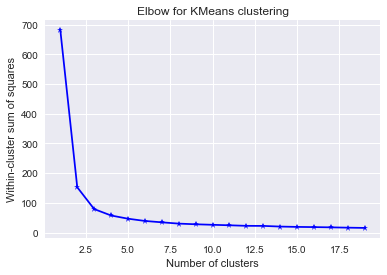

In [41]:
plt.plot(K, WCSSs, 'b*-')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

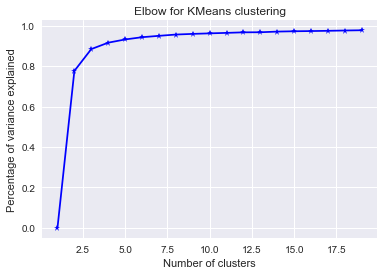

In [42]:
plt.plot(K, VAR_explained, 'b*-')
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')

# Silhouette Score

In [43]:
from sklearn.metrics import silhouette_score

In [44]:
km.labels_

array([14,  4,  4,  4, 14,  1,  4, 14,  4,  4,  1, 14,  4,  4,  1,  1,  1,
       14,  1,  1, 14, 14,  4, 14, 14,  4, 14, 14, 14,  4,  4, 14,  1,  1,
        4,  4,  1,  4,  4, 14, 14, 16,  4, 14,  1,  4,  1,  4,  1, 14,  9,
       15,  9,  8,  9, 17, 15,  5,  9,  8,  5,  2,  8, 15,  8,  9, 17,  8,
       12,  8, 10,  2,  3, 15, 15,  9,  9,  9, 15,  8,  8,  8,  8,  3, 17,
       15,  9, 12,  2,  8, 17, 15,  8,  5,  2,  2,  2, 15,  5,  2,  0, 10,
       11, 18,  0,  6, 17, 11, 18,  0,  7, 18,  7, 10, 10,  7, 18, 13,  6,
       12,  0, 10,  6,  3,  0, 11,  3, 10, 18, 11, 11, 13, 18,  3, 18, 11,
        0, 18, 10,  7,  0,  7, 10,  0,  0,  7,  3,  7,  7, 10], dtype=int32)

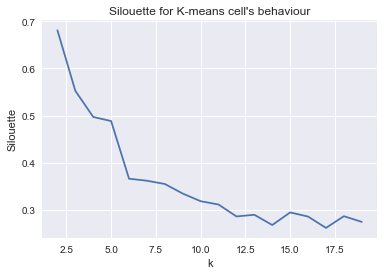

In [45]:
K = range(2,20)

scores = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)

    labels = kmeans.labels_
#     centroids = kmeans.cluster_centers_
    score = silhouette_score(data, labels, metric='euclidean')
    scores.append(score)

plt.plot(K, scores)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")

# Stability

In [46]:
sampled = data[np.random.sample(len(data))<0.8]

In [47]:
from sklearn.metrics import jaccard_similarity_score

In [48]:
def dot(X, Y):
    return (X * Y).sum()

In [49]:
kmeans = KMeans(n_clusters=3)

In [50]:
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [51]:
def labelC(labels):
    n = len(labels)
    C = np.zeros((n, n))
    for i in range(n):
        C[i,:] = labels[i] == labels
        C[i,i] = 0
    return C

In [52]:
C = labelC(kmeans.labels_)
C

array([[ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [53]:
C.shape

(150, 150)

In [54]:
def J(L1, L2):
    C1 = labelC(L1)
    C2 = labelC(L2)
    return dot(C1, C2) / (dot(C1, C1) + dot(C2, C2) - dot(C1, C2))

In [55]:
J(labels, labels)

1.0

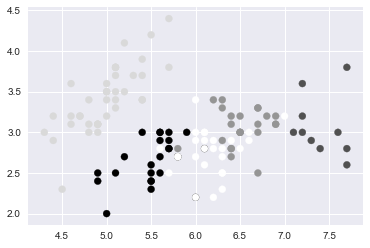

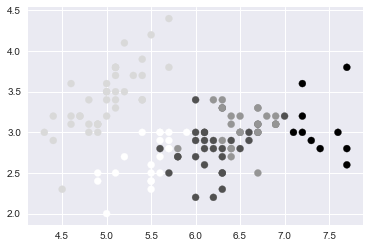

In [56]:
kmeans = KMeans(n_clusters=5)
sampled = data[np.random.sample(len(data))<0.8]
kmeans.fit(sampled)
plt.scatter(sampled[:,0], sampled[:,1], c=kmeans.labels_)
plt.show()
kmeans.fit(sampled)
plt.scatter(sampled[:,0], sampled[:,1], c=kmeans.labels_)

2


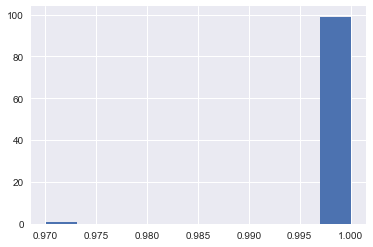

3


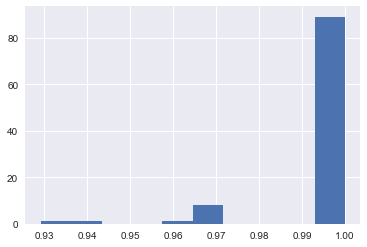

4


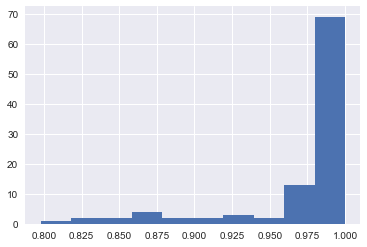

5


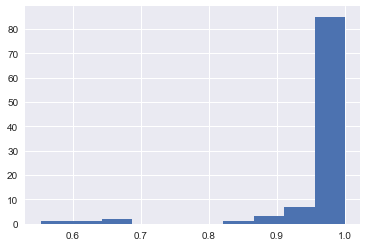

6


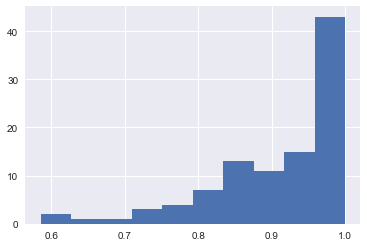

7


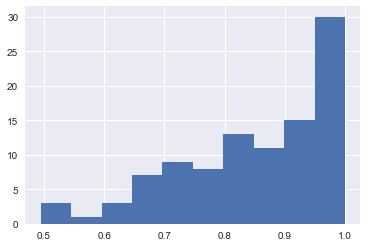

8


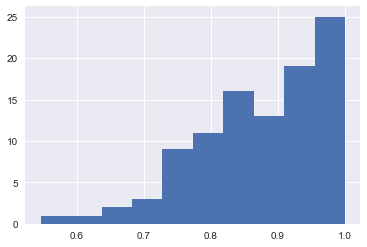

9


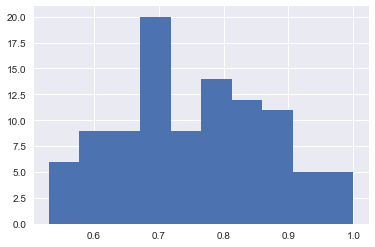

10


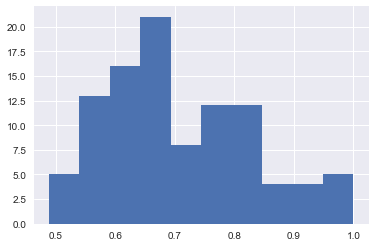

11


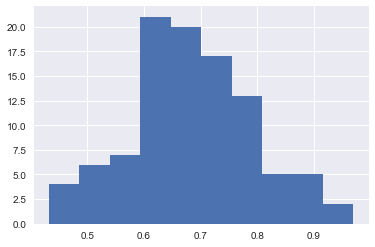

KeyboardInterrupt: 

In [57]:
K = range(2,15)
num = 100
jss = []
for k in K:
    js = []
    for n in range(num):
        sampled = data[np.random.sample(len(data)) < 0.8]
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(sampled)
        L1 = kmeans.labels_
        kmeans.fit(sampled)
        L2 = kmeans.labels_
        j = J(L1, L2)
        js.append(j)
    print(k)
    plt.hist(js)
    plt.show()
    jss.append(js)

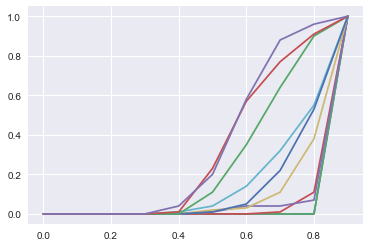

In [58]:
for js in jss[:10]:
    hist = np.histogram(js, range=(0,1))[0]
    plt.plot(np.arange(0, 1, 0.1), hist.cumsum() / num)
plt.show()

In [595]:
len(jss[:4])

4